In [1]:
import entries_parsing as ep
import torch
import numpy as np
time_dlgm = "../Time-DLGM/entries"
rnn = "../RNN_NEW/entries"
dlgm = "../DLGM/entries"
gan = "../GAN/entries"


data_rnn = ep.get_file(rnn)
data_time_dlgm = ep.get_file(time_dlgm)
data_dlgm = ep.get_file(dlgm)
data_gan = ep.get_file(gan)

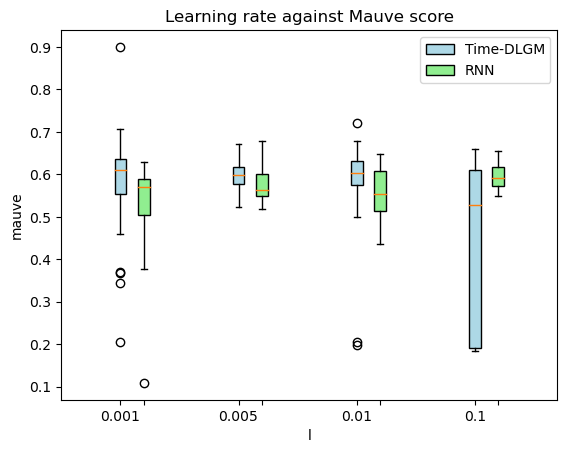

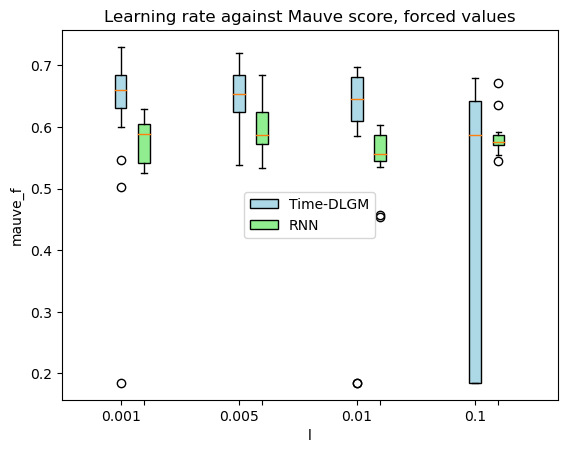

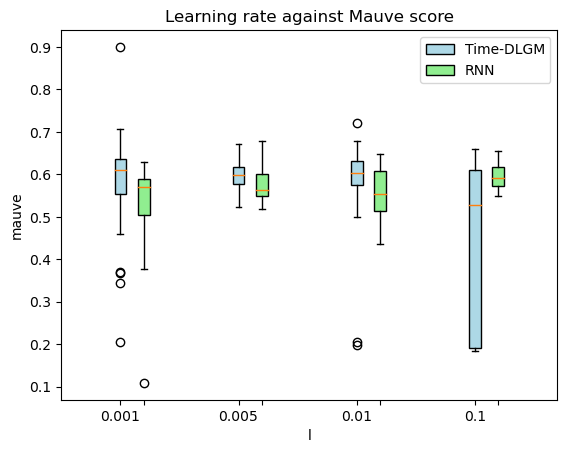

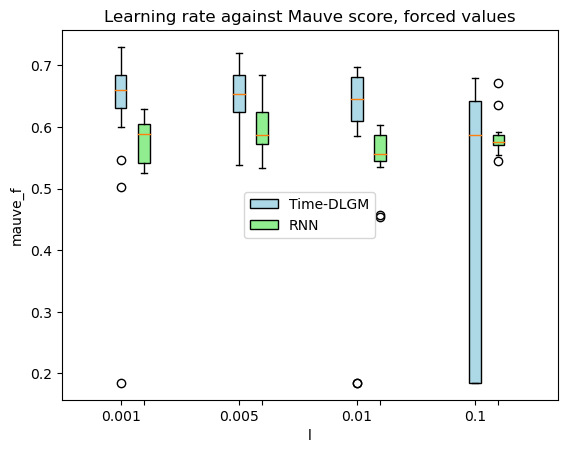

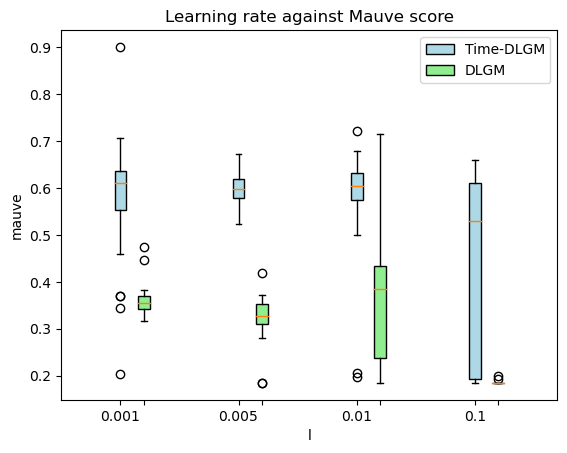

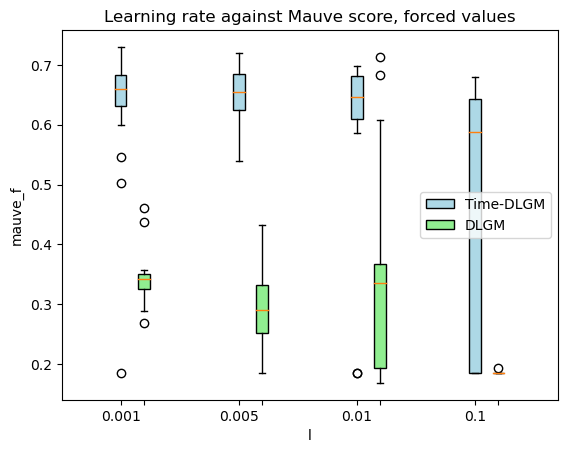

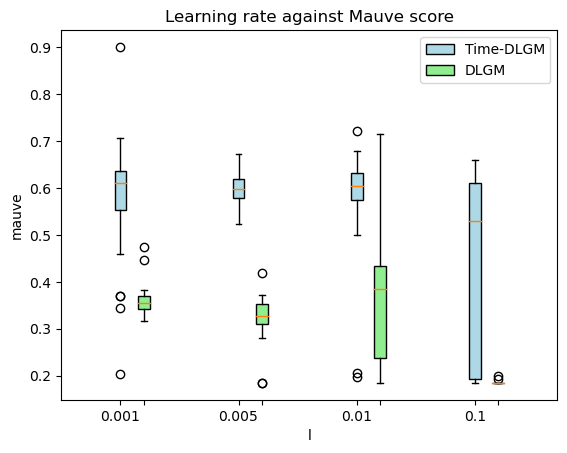

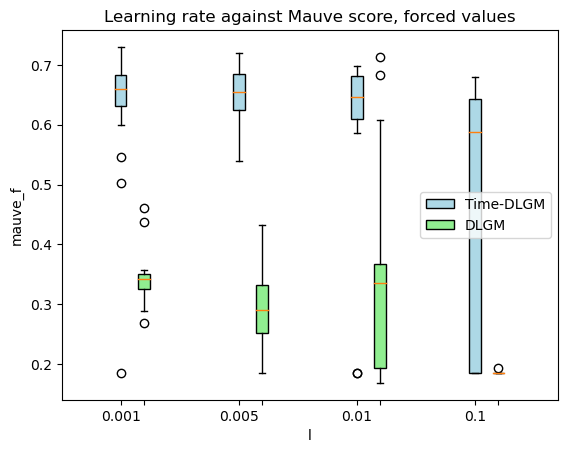

In [2]:


ep.multiple_box_plots(data_time_dlgm, data_rnn,
                     x_label="l", y_label="mauve",
                     label_1="Time-DLGM", label_2="RNN",
                     title="Learning rate against Mauve score")


ep.multiple_box_plots(data_time_dlgm, data_rnn,
                     x_label="l", y_label="mauve_f",
                     label_1="Time-DLGM", label_2="RNN",
                     title="Learning rate against Mauve score, forced values")





ep.multiple_box_plots(data_time_dlgm, data_rnn,
                     x_label="l", y_label="mauve",
                     label_1="Time-DLGM", label_2="RNN",
                     title="Learning rate against Mauve score")


ep.multiple_box_plots(data_time_dlgm, data_rnn,
                     x_label="l", y_label="mauve_f",
                     label_1="Time-DLGM", label_2="RNN",
                     title="Learning rate against Mauve score, forced values")





ep.multiple_box_plots(data_time_dlgm, data_dlgm,
                     x_label="l", y_label="mauve",
                     label_1="Time-DLGM", label_2="DLGM",
                     title="Learning rate against Mauve score")


ep.multiple_box_plots(data_time_dlgm, data_dlgm,
                     x_label="l", y_label="mauve_f",
                     label_1="Time-DLGM", label_2="DLGM",
                     title="Learning rate against Mauve score, forced values")





ep.multiple_box_plots(data_time_dlgm, data_dlgm,
                     x_label="l", y_label="mauve",
                     label_1="Time-DLGM", label_2="DLGM",
                     title="Learning rate against Mauve score")


ep.multiple_box_plots(data_time_dlgm, data_dlgm,
                     x_label="l", y_label="mauve_f",
                     label_1="Time-DLGM", label_2="DLGM",
                     title="Learning rate against Mauve score, forced values")

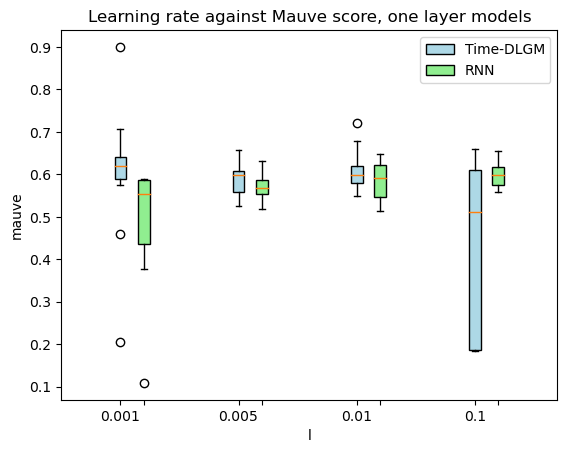

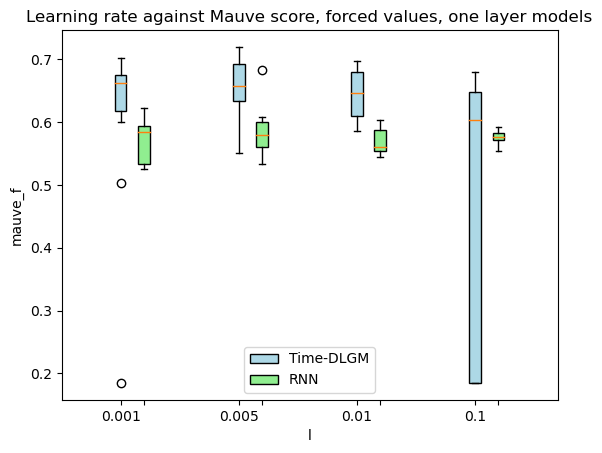

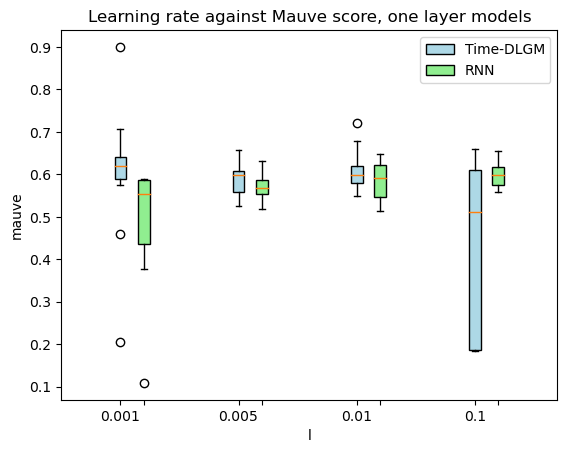

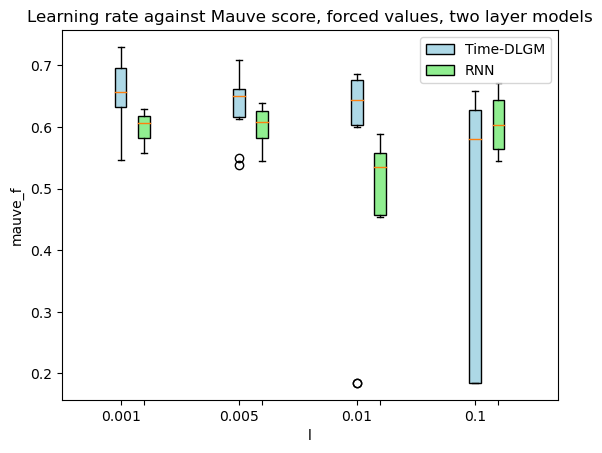

In [3]:
rnn_one = ep.get_entries_with_value(data_rnn, "layers", "1")
rnn_two = ep.get_entries_with_value(data_rnn, "layers", "2")
time_dlgm_one = ep.get_entries_with_value(data_time_dlgm, "layers", "1")
time_dlgm_two = ep.get_entries_with_value(data_time_dlgm, "layers", "2")





ep.multiple_box_plots(time_dlgm_one, rnn_one,
                     x_label="l", y_label="mauve",
                     label_1="Time-DLGM", label_2="RNN",
                     title="Learning rate against Mauve score, one layer models")


ep.multiple_box_plots(time_dlgm_one, rnn_one,
                     x_label="l", y_label="mauve_f",
                     label_1="Time-DLGM", label_2="RNN",
                     title="Learning rate against Mauve score, forced values, one layer models")


ep.multiple_box_plots(time_dlgm_one, rnn_one,
                     x_label="l", y_label="mauve",
                     label_1="Time-DLGM", label_2="RNN",
                     title="Learning rate against Mauve score, one layer models")


ep.multiple_box_plots(time_dlgm_two, rnn_two,
                     x_label="l", y_label="mauve_f",
                     label_1="Time-DLGM", label_2="RNN",
                     title="Learning rate against Mauve score, forced values, two layer models")




In [4]:
from data_gen import Datagen

gen = Datagen(None)

x, y = gen.get_test_data(1)
y

data_rnn = ep.get_file(rnn)
data_time_dlgm = ep.get_file(time_dlgm)



In [5]:
print(y.size())
len(data_time_dlgm[-2]["y_hat_test_f"])

torch.Size([500, 1])


500

Time-DLGM tensor([0.1103])
RNN: tensor([0.2647])
DLGM: tensor([0.2506])
GAN: tensor([0.2735])


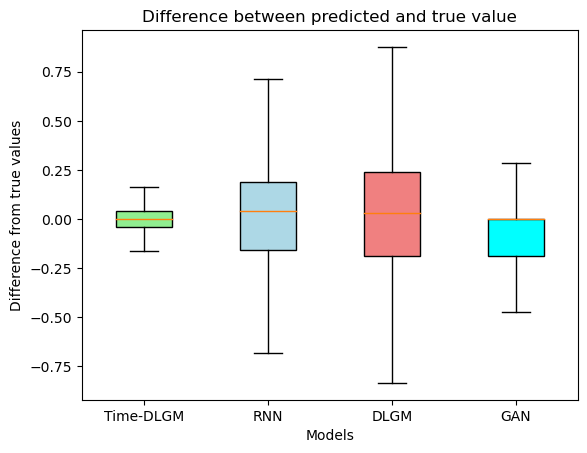

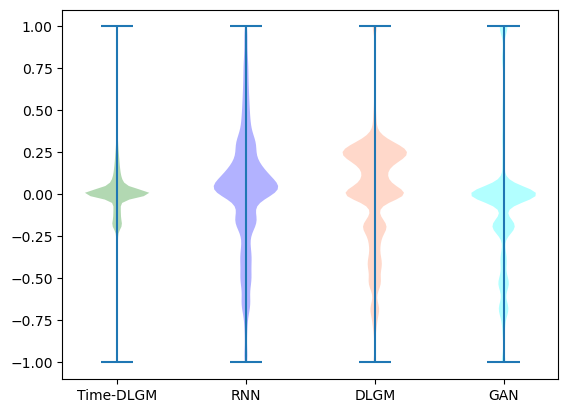

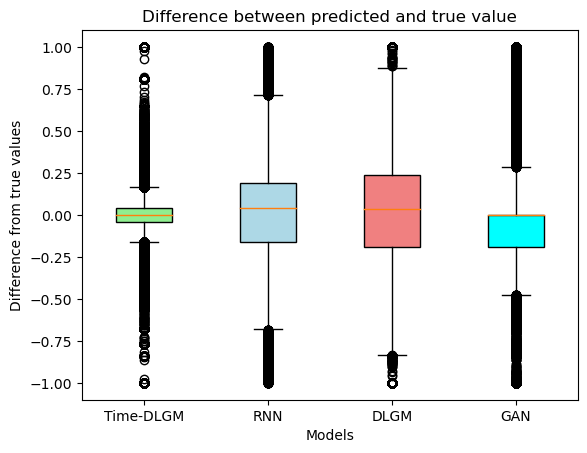

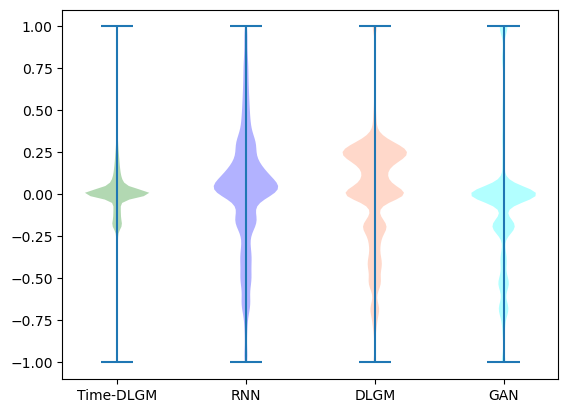

In [6]:

def recall_loss(y, values, size=500):
    to_return = 0
    for true, generated in zip(y, values):
        to_return += np.abs(true - generated)
    return to_return / size
        
def vector_test_loss(y, values, size=500):
    t_y = torch.tensor(values).unsqueeze(1)
    return y - t_y


x, t = gen.get_test_data(1)

all_rnn = []
all_dlgm = []
all_time_dlgm = []
all_gan = []

mean_recall_loss_time_dlgm = 0
count = 0
for rec in data_time_dlgm:
    if "y_hat_test_f" in rec:
        mean_recall_loss_time_dlgm += recall_loss(t, rec["y_hat_test_f"])
        curr = vector_test_loss(t, rec["y_hat_test_f"])
        for c in curr:
            all_time_dlgm.append(c.item())

        count += 1
        
total_recall_loss_time_dlgm = mean_recall_loss_time_dlgm
mean_recall_loss_time_dlgm /= count


mean_recall_loss_rnn = 0
count = 0
for rec in data_rnn:
    if "y_hat_test_f" in rec:
        mean_recall_loss_rnn += recall_loss(t, rec["y_hat_test_f"])
        curr = vector_test_loss(t, rec["y_hat_test_f"])
        for c in curr:
            all_rnn.append(c.item())

        count += 1

total_recall_loss_rnn = mean_recall_loss_rnn
mean_recall_loss_rnn /= count     
        
        
mean_recall_loss_dlgm = 0
count = 0
for rec in data_dlgm:
    if "y_hat_test_f" in rec:
        mean_recall_loss_dlgm += recall_loss(t, rec["y_hat_test_f"])
        curr = vector_test_loss(t, rec["y_hat_test_f"])
        for c in curr:
            all_dlgm.append(c.item())

        count += 1
 
total_recall_loss_dlgm = mean_recall_loss_dlgm
mean_recall_loss_dlgm /= count


      
mean_recall_loss_gan = 0
count = 0
for rec in data_gan:
    if "y_hat_test_f" in rec:
        mean_recall_loss_gan += recall_loss(t, rec["y_hat_test_f"])
        curr = vector_test_loss(t, rec["y_hat_test_f"])
        for c in curr:
            all_gan.append(c.item())

        count += 1
 
total_recall_loss_gan = mean_recall_loss_gan
mean_recall_loss_gan /= count


print("Time-DLGM", mean_recall_loss_time_dlgm)
print("RNN:", mean_recall_loss_rnn)
print("DLGM:", mean_recall_loss_dlgm)
print("GAN:", mean_recall_loss_gan)


data = [[i for i in all_time_dlgm],
        [i for i in all_rnn],
        [i for i in all_dlgm],
       [i for i in all_gan]]

labels = ["Time-DLGM", "RNN", "DLGM", "GAN"]

title = "Difference between predicted and true value"
color = ["lightgreen", "lightblue", "lightcoral", "aqua"]
color_v = ["green", "blue", "coral", "aqua"]
ep.boxplot_two_values(data, labels,
                      "Models", "Difference from true values",
                           title, color=color,color_v=color_v)

ep.boxplot_two_values(data, labels,
                      "Models", "Difference from true values",
                           title, color=color,color_v=color_v, outliers=True)


Time-DLGM: tensor([0.0610])
RNN: tensor([0.2275])
GAN: tensor([0.2044])
DLGM: tensor([0.2044])


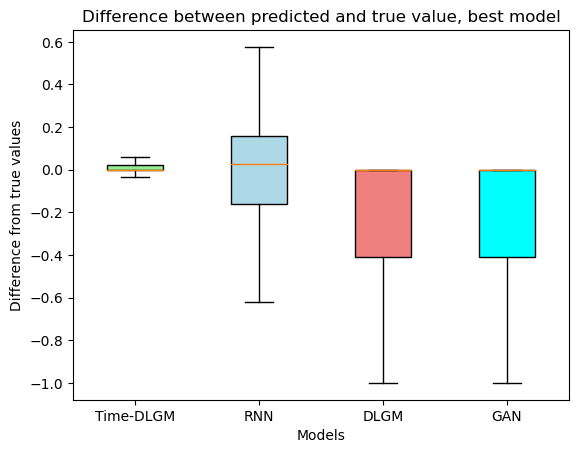

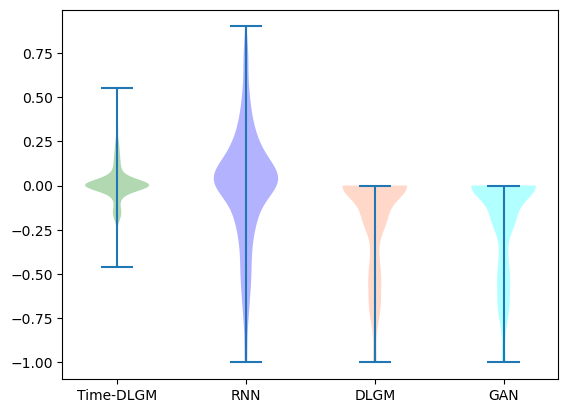

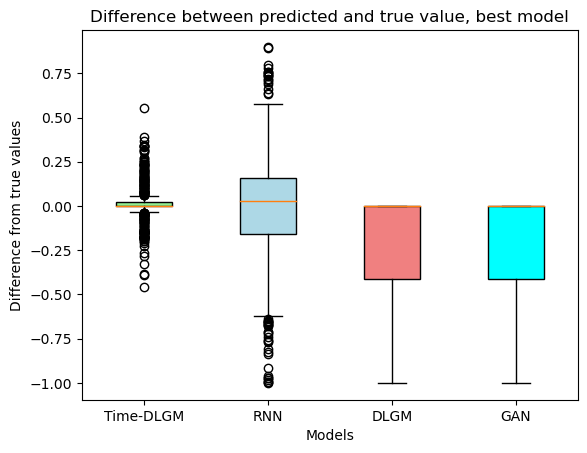

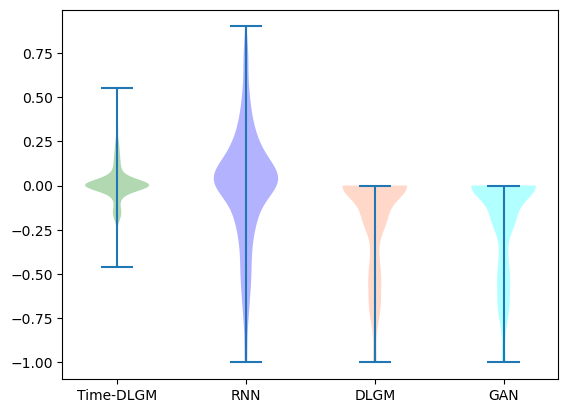

In [9]:


best_recall_time_dlgm = 1000
best_recall_rnn = 1000
best_time_dlgm = None
best_rnn = None
best_recall_dlgm = 1000
best_dlgm = None
best_gan = None
best_recall_gan = 1000

for rec in data_time_dlgm:
    if "y_hat_test_f" in rec:
        r = recall_loss(t, rec["y_hat_test_f"])
        if r < best_recall_time_dlgm:
            best_recall_time_dlgm = r
            best_time_dlgm = vector_test_loss(t, rec["y_hat_test_f"])
for rec in data_rnn:
    if "y_hat_test_f" in rec:
        r = recall_loss(t, rec["y_hat_test_f"])
        if r < best_recall_rnn:
            best_recall_rnn = r
            best_rnn = vector_test_loss(t, rec["y_hat_test_f"])

for rec in data_dlgm:
    if "y_hat_test_f" in rec:
        r = recall_loss(t, rec["y_hat_test_f"])
        if r < best_recall_dlgm:
            best_recall_dlgm = r
            best_dlgm = vector_test_loss(t, rec["y_hat_test_f"])
 
for rec in data_gan:
    if "y_hat_test_f" in rec:
        r = recall_loss(t, rec["y_hat_test_f"])
        if r < best_recall_gan:
            best_recall_gan = r
            best_gan = vector_test_loss(t, rec["y_hat_test_f"])

            
print("Time-DLGM:", best_recall_time_dlgm)
print("RNN:", best_recall_rnn)
print("GAN:", best_recall_gan)
print("DLGM:", best_recall_dlgm)

data = [[i.item() for i in best_time_dlgm],
        [i.item() for i in best_rnn],
        [i.item() for i in best_dlgm],
       [i.item() for i in best_gan]]

labels = ["Time-DLGM", "RNN", "DLGM", "GAN"]

title = "Difference between predicted and true value, best model"
color = ["lightgreen", "lightblue", "lightcoral", "aqua"]
color_v = ["green", "blue", "coral", "aqua"]

ep.boxplot_two_values(data, labels,
                      "Models", "Difference from true values",
                           title, color=color,color_v=color_v)

ep.boxplot_two_values(data, labels,
                      "Models", "Difference from true values",
                           title, color=color,color_v=color_v, outliers=True)


In [8]:
_ = vector_test_loss(t, data_time_dlgm[-2]["y_hat_test_f"])


In [10]:
x_t, y_t = gen.get_true_data(1)

y_t

tensor([[1.0000],
        [0.4600],
        [1.0000],
        ...,
        [1.0000],
        [1.0000],
        [1.0000]])